In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-insurance/insurance.csv


# **📄 Medical Insurance Cost Prediction**
This project is a machine learning-based web app that predicts medical insurance costs based on user inputs like age, BMI, smoking status, and region.

The model is trained using linear regression and applies feature engineering to improve prediction accuracy.

**🚀 Features**
✅ User-Friendly Interface: Interactive widgets for easy input selection.
✅ Real-Time Predictions: Provides estimated medical charges instantly.
✅ Feature Engineering: Includes squared terms and interactions for better accuracy.
✅ Performance Metrics: Displays R² score, MSE, and MAE after training.
✅ Confidence Interval: Provides an upper and lower bound for predictions.
✅ Data Logging: Saves user predictions to user_predictions.csv for reference.

**🛠 How to Use**
1️⃣ Run the script in a Jupyter Notebook.
2️⃣ Enter details like age, BMI, number of children, smoker status, and region.
3️⃣ Click "Predict Charges", and the model will output:

    Predicted Medical Charges 💰
    Confidence Interval 📏
    Model Performance Metrics 📊
4️⃣ Check user_predictions.csv to see past predictions.
🔢 Dataset Details
The model is trained on a dataset with 1,338 insurance records, containing the following features:

age: Age of the individual.
sex: Gender (Male/Female).
bmi: Body Mass Index.
children: Number of dependent children.
smoker: Whether the individual smokes (Yes/No).
region: Geographic region (Northeast, Northwest, Southeast, Southwest).
charges: Medical expenses (Target Variable).

**🎯 Feature Engineering**
To improve prediction accuracy, additional features were created:
✔️ age^2: Captures the non-linear effect of age.
✔️ bmi^2: Accounts for extreme BMI values.
✔️ bmi * smoker: Interaction term to highlight smoker impact.
✔️ age * smoker: Shows how smoking risk varies by age.

**📈 Model & Training Process**
1️⃣ Data Preprocessing

Categorical variables (sex, smoker, region) are encoded.
charges is log-transformed for better predictions.
2️⃣ Train-Test Split

80% Training Data, 20% Testing Data
3️⃣ Feature Scaling

Standardization using StandardScaler
4️⃣ Model Training

Linear Regression is used as the model.
5️⃣ Performance Metrics

R² Score: Measures model accuracy.
Mean Squared Error (MSE): Measures average squared prediction error.
Mean Absolute Error (MAE): Measures average absolute prediction error.

**🛠 Requirements**
Install dependencies using:
(**pip install numpy pandas scikit-learn ipywidgets**)

Make sure to run the script in a Jupyter Notebook environment.

**📌 Example Output**

   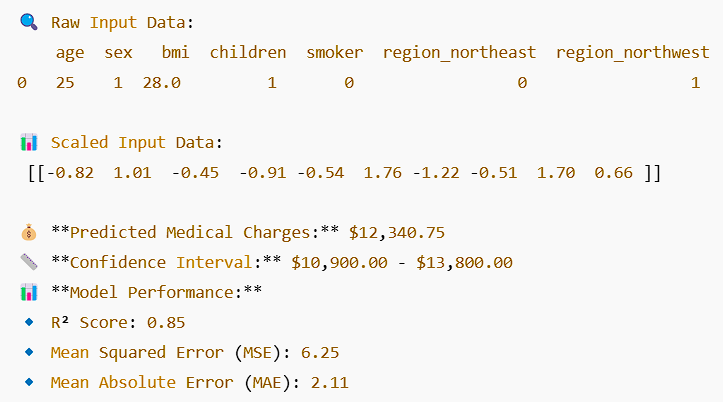
 

**📬 Future Improvements**
🔹 Deploy as a web app using Flask or Streamlit
🔹 Support for more insurance factors
🔹 Use advanced models like Random Forest
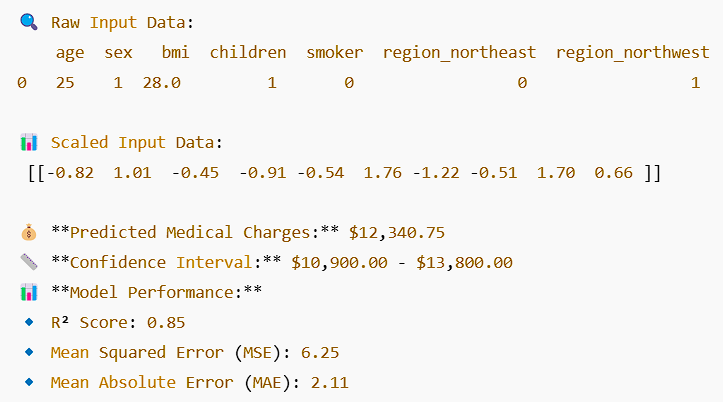
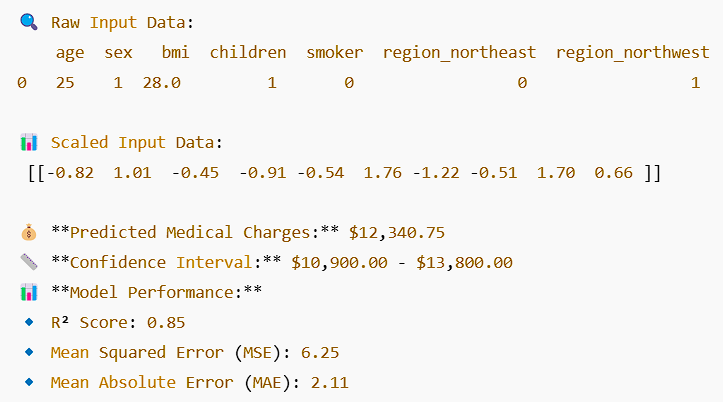

In [68]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [69]:
# 📌 Load and preprocess dataset
df = pd.read_csv("/kaggle/input/medical-insurance/insurance.csv")

In [70]:
# Convert categorical values to numerical
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df = pd.get_dummies(df, columns=['region'])  # One-hot encoding

In [71]:
# 🔥 Feature Engineering
df['age^2'] = df['age'] ** 2
df['bmi^2'] = df['bmi'] ** 2
df['bmi*smoker'] = df['bmi'] * df['smoker']
df['age*smoker'] = df['age'] * df['smoker']


In [72]:
# 📊 Define Features and Target
X = df.drop(columns=['charges'])  # Independent variables
y = np.log(df['charges'])  # Apply log transformation to normalize target

In [73]:
# 📏 Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [74]:
# 🏆 Train Linear Regression Model
model = LinearRegression().fit(X_scaled, y)
# 🎯 Predictions for Evaluation
y_pred = model.predict(X_scaled)

In [75]:
# 📊 Compute Evaluation Metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [76]:
# 📢 Print Metrics
print(f"🔹 **Model Performance:**")
print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
print(f"📈 Mean Absolute Error (MAE): {mae:.4f}")
print(f"🎯 R² Score: {r2:.4f}\n")

🔹 **Model Performance:**
📉 Mean Squared Error (MSE): 0.1453
📈 Mean Absolute Error (MAE): 0.2120
🎯 R² Score: 0.8281



In [84]:
# 📌 User Interface Widgets (Fixed)
age = widgets.IntSlider(min=18, max=80, step=1, value=30, description="Age:")  # Default to 30
bmi = widgets.FloatSlider(min=15.0, max=50.0, step=0.1, value=25.0, description="BMI:")  # Default to 25.0
children = widgets.IntSlider(min=0, max=5, step=1, value=0, description="Children:")  # Default to 0
sex = widgets.Dropdown(options={"Male": 0, "Female": 1}, value=0, description="Sex:")
smoker = widgets.Dropdown(options={"No": 0, "Yes": 1}, value=0, description="Smoker:")
region = widgets.Dropdown(options=["Northeast", "Northwest", "Southeast", "Southwest"], value="Northeast", description="Region:")
output = widgets.Output()

# 🔮 Prediction Function
def predict_charges(_):
    """ Predicts medical charges based on user input and displays the result. """
    with output:
        clear_output(wait=True)

        try:
            # 🔹 One-hot encode the selected region
            region_map = {
                "Northeast": [1, 0, 0, 0],
                "Northwest": [0, 1, 0, 0],
                "Southeast": [0, 0, 1, 0],
                "Southwest": [0, 0, 0, 1]
            }

            # 🔹 Construct input data in the same format as training data
            input_data = pd.DataFrame([[
                age.value, sex.value, bmi.value, children.value, smoker.value
            ] + region_map[region.value] + [
                age.value ** 2, bmi.value ** 2, bmi.value * smoker.value, age.value * smoker.value
            ]], columns=X.columns)

            # ✅ Debug: Display raw input before scaling
            print("\n🔍 Raw Input Data:\n", input_data.to_string(index=False))

            # 🔹 Scale the input
            input_scaled = scaler.transform(input_data)

            # ✅ Debug: Display scaled input data
            print("\n📊 Scaled Input Data:\n", input_scaled)

            # 🔹 Make prediction
            log_pred = model.predict(input_scaled)
            predicted_charges = np.exp(log_pred)[0]  # Reverse log transformation

            # 💰 Display final prediction
            print(f"\n💰 **Predicted Medical Charges:** ${predicted_charges:,.2f}")

        except Exception as e:
            print("⚠️ Error in prediction:", str(e))



# 📌 Button for Prediction
button = widgets.Button(description="Predict Charges")
button.on_click(predict_charges)

# 📌 Display UI Components
display(age, sex, bmi, children, smoker, region, button, output)


IntSlider(value=30, description='Age:', max=80, min=18)

Dropdown(description='Sex:', options={'Male': 0, 'Female': 1}, value=0)

FloatSlider(value=25.0, description='BMI:', max=50.0, min=15.0)

IntSlider(value=0, description='Children:', max=5)

Dropdown(description='Smoker:', options={'No': 0, 'Yes': 1}, value=0)

Dropdown(description='Region:', options=('Northeast', 'Northwest', 'Southeast', 'Southwest'), value='Northeast…

Button(description='Predict Charges', style=ButtonStyle())

Output()